In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


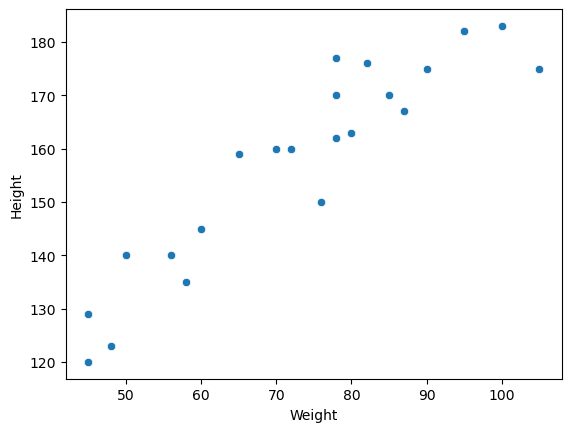

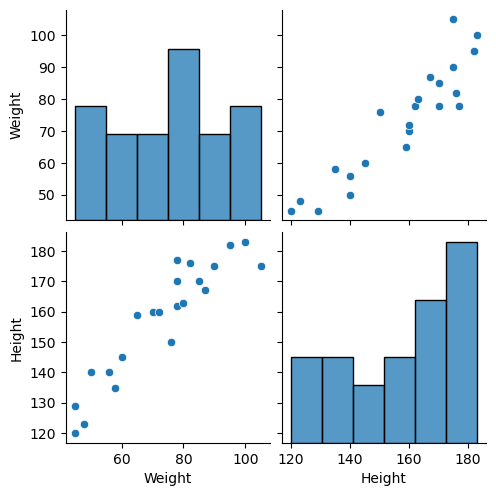

In [4]:
sns.scatterplot(data=df,x='Weight',y='Height')
sns.pairplot(df)

In [14]:
X=df[["Weight"]]
type(X)

pandas.core.frame.DataFrame

In [16]:
Y=df['Height']

In [17]:
#split training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=42)

In [18]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [21]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [24]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


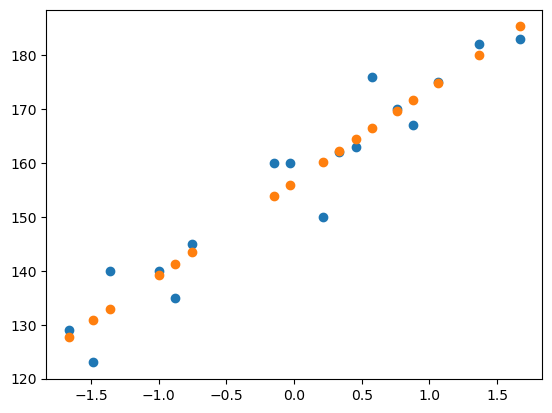

In [25]:
# See plot
plt.scatter(X_train,Y_train)
plt.scatter(x=X_train,y=regression.predict(X_train))

In [26]:
# Prediction for test data
Y_pred=regression.predict(X_test)

In [34]:
regression.predict(scaler.transform([[50]]))

c:\Users\Tafheem Ahemad\anaconda3\envs\py312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([131.89459915])

In [ ]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

160.95146497458572
11.76395723317914
12.686664848358914


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [30]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print("R_square",score)
print("Adjusted R_square",1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

R_square 0.6301147309872273
Adjusted R_square 0.537643413734034
